In [ ]:
'''This notebook runs and displays poincare analusis of PSP data from Stasinski et al. 2024
by Jan Stasinski'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
import scipy.io as sio
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from tvb.simulator.lab import connectivity
from collections import Counter
import os

import sys
#sys.path.append('/Users/jansta/fic_jansen/stability_analysis')
sys.path.append('/Users/Documents/Prywata/code_samples/py_scipts')
from supplementary_functions import *

import string

/Users/jansta/miniconda3/envs/main_env/lib/python3.11/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
SC_LOC = '/Users/jansta/fic_jansen/HCP_mats/'
DATA_LOC = '/Users/jansta/fic_jansen/stability_analysis/paper_sims/paper_hcp_sims/y0_072/'
PLOT_LOC = '/Users/jansta/fic_jansen/stability_analysis/paper_plots/XI_plots/'
DATA_LOC2 = '/Users/jansta/fic_jansen/stability_analysis/paper_sims/paper_hcp_sims/y0_X/'
save_the_data = False
save_the_plots = False

plt.rcParams["text.usetex"] = True

lat_y0t = '$y_{{0}}^{{\\mathrm{{target}}}}$'

PanelLettersUpper = np.array([rf"${{\bf {alpha}}}$" for alpha in string.ascii_uppercase[:25]], dtype=object)

PanelLettersNumbersUpper = np.array(
    [[fr"{{\bf {alpha}{i + 1}}}" for alpha in string.ascii_uppercase[:10]] for i in
     range(12)])

/var/folders/x5/d8lz0rt51159nw55bngwkm240000gn/T/ipykernel_62014/2657267772.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


[42 30 79 35 53  3  2  4 52 36 43 51 20 69 10 59 22 34 17 45 83 71 82 66
 33 24 38 62 73 13 26 16 44 75 37 68 65  6 19 27 76 18  1 50 29 55 40 49
 78  0 72 70 47 80 23 21 31 67 64 15  5 32 60 54 11 81 14  9 74 39 63 25
 46 41 77 58 28 48 12 56  7 61  8 57]


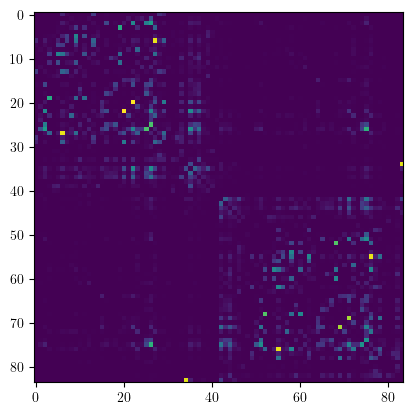

In [3]:
s_conn = connectivity.Connectivity(weights = sio.loadmat(SC_LOC + 'avgSC_DK.mat')['SC_avg_weights'],
                                tract_lengths= sio.loadmat(SC_LOC +'avgSC_DK.mat')['SC_avg_dists'])
s_conn.weights = s_conn.weights - s_conn.weights*np.eye(s_conn.weights.shape[0])
s_conn.weights = s_conn.scaled_weights(mode='tract')
s_conn.region_labels=np.loadtxt('/Users/jansta/JR_simulations/Preprocessed_Data_PCK/sample_SC/' + 'region_labels.txt', dtype=str) 
s_conn.centres = np.loadtxt('/Users/jansta/JR_simulations/Preprocessed_Data_PCK/sample_SC/' + 'centres.txt',dtype=float)
s_conn.configure()
plt.imshow(s_conn.weights)
N_nodes = s_conn.weights.shape[0]
cmap = cm.get_cmap('viridis')
cmap84 = cmap(np.linspace(0, 1, N_nodes))
cmap84= LinearSegmentedColormap.from_list('custom_cmap', cmap84, N=N_nodes)


## getting the indegree ordered nodes of SC:
connectivity_rowsum = s_conn.weights.sum(axis=0)
#print(connectivity_rowsum )
connectivity_rowsum -= connectivity_rowsum.min()
connectivity_rowsum /= connectivity_rowsum.max()
connectivity_rowsum = connectivity_rowsum[::-1]

node_order = connectivity_rowsum.argsort()
print(node_order)

In [4]:


post1 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 20)[0]
#post2 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) == 23)
post3 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.1_072.npy', allow_pickle=True) if int(sgc_data[3]) == 19)[0]


In [5]:
nof1 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 9)[0]
#nof2 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.004_072.npy', allow_pickle=True) if int(sgc_data[3]) ==  22)
nof3 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) ==  23)[0]

In [6]:
mnof1 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 20)[0]
#mnof2 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) == 23)
mnof3 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.1_072.npy', allow_pickle=True) if int(sgc_data[3]) == 19)[0]

In [7]:
o_param = 50
plt.rcParams.update({'font.size': 18})

In [8]:
from collections import Counter

# def regimes_counter(pp, cut_off=6, perc_td=7.5):
#     """
#     Count and analyze regimes in a time series data.

#     This function takes a list of values `pp`, representing a time series, and calculates the occurrences and percentages
#     of different regimes in the time series. Regimes are categorized into three types: 'FP' (Fixed Point),
#     'SLC' (Slow Limit Cycle), and 'FLC' (Fast Limit Cycle).

#     Parameters:
#     pp (list): A list of numeric values representing a time series.
#     cut_off (int, optional): A threshold value to determine 'FP', 'SLC', and 'FLC'. Default is 6.
#     perc_td (int, optional): The percentage threshold to identify different regimes in the time series. Default is 5.

#     Returns:
#     dict: A dictionary containing the counts and percentages of each regime in the time series.
#     int: The number of different regimes that meet the percentage threshold.
#     """

#     # Initialize a dictionary to count different regimes
#     p_dict = {reg: 0 for reg in ['FP', 'SLC', 'FLC']}

#     # Loop through the time series to count regimes
#     for index in range(len(pp) - 1):
#         if pp[index] < cut_off and pp[index + 1] < cut_off:
#             p_dict['FP'] += 1
#         elif pp[index] > cut_off and pp[index + 1] > cut_off:
#             p_dict['FLC'] += 1
#         else:
#             p_dict['SLC'] += 1

#     # Calculate percentages for each regime
#     for regime in p_dict:
#         p_dict[regime] = (p_dict[regime] / (len(pp) - 1)) * 100

#     # Count the number of different regimes that meet the percentage threshold
#     c = 0
#     for value in p_dict.values():
#         if value >= perc_td:
#             c += 1

#     return p_dict, c


# def poincare_analysis(psps, node_order, ax, o_par=50, cmap=cmap84, node_dict=None):
# # The poincare_analysis function performs a Poincaré analysis on a time-series data. 
# # It calculates the intersection points of the time-series data and plots a Poincaré map.
# # It also counts the number of regimes per node based on a specified cut-off line.
#     if not node_dict: node_dict = {}
#     reg_reg = {}
#     print(psps.shape)
#     N_nodes = psps.shape[1]
#     for idx, n in enumerate(node_order[:N_nodes:1]):
#         # Find local minima or maxima as potential intersection points
#         local_extrema_indices = sig.argrelextrema(psps[:,n], np.greater, order=o_par)  # Change np.less to np.greater for maxima
#         # Extract intersection points from the time-series data
#         poincare_points = psps[:,n][local_extrema_indices]
#         # count the regimes per node based on cut_off line:
#         cut_off = 6.2
#         p_dict, c = regimes_counter(poincare_points, cut_off)
#         # store them in dict
#         node_dict[n] = p_dict
#         reg_reg[n] = c
#         # Plot the Poincaré map
#         im = ax.scatter(poincare_points[:-1], poincare_points[1:], s=40, marker ='.', color=cmap(n), alpha=0.55)
#         ax.set_xlabel('PSP(t)')
#         ax.set_ylabel('PSP(t+1)')
#         ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
#         #np.save(DATA_LOC + f'regimes_node_dict_{node_dict["sim"]}_A.npy', node_dict, allow_pickle=True)
    
#     reg_dict = Counter()

#     for node in node_dict.keys():
#         for reg in node_dict[node]:
#             reg_dict[reg] += node_dict[node][reg] / N_nodes
        
#     reg_dict = {reg:np.round(reg_dict[reg], 3) for reg in reg_dict.keys()}

#     reg_count = Counter()
#     for node in reg_reg.keys():
#         if reg_reg[node] == 1: reg_count[1] += 1
#         if reg_reg[node] == 2: reg_count[2] += 1
#         if reg_reg[node] == 3: reg_count[3] += 1

#     return reg_dict, reg_count, node_dict, ax, im
    


(150001, 84)


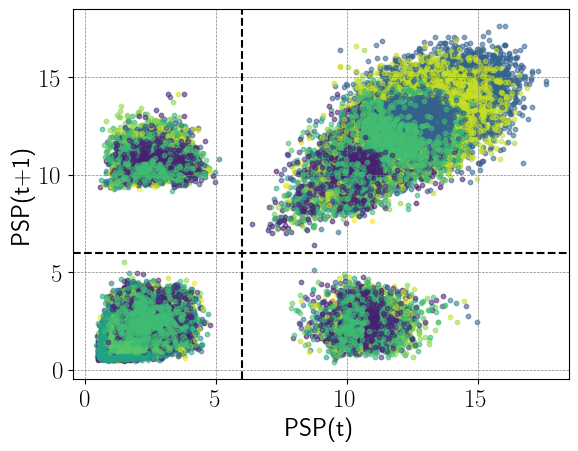

In [9]:
f ,ax  = plt.subplots()
pnd, rc, snd, axis, im = poincare_analysis(post1[:,:], node_order,  ax, cmap=cmap84)
axis.axhline(6, color='k', linestyle='--')
axis.axvline(6, color='k', linestyle='--')
if save_the_plots:
    f.savefig(PLOT_LOC + 'poinc_example.jpg')

### running the analysis for the selected simulations from the simulated dataset:

In [11]:
custom_panels = np.array(['${\\bf A1}$', '${\\bf B1}$','${\\bf A2}$', '${\\bf B2}$'])

(150001, 84)
(150001, 84)
dict_values([15, 39, 30])
dict_values([44, 20, 20])


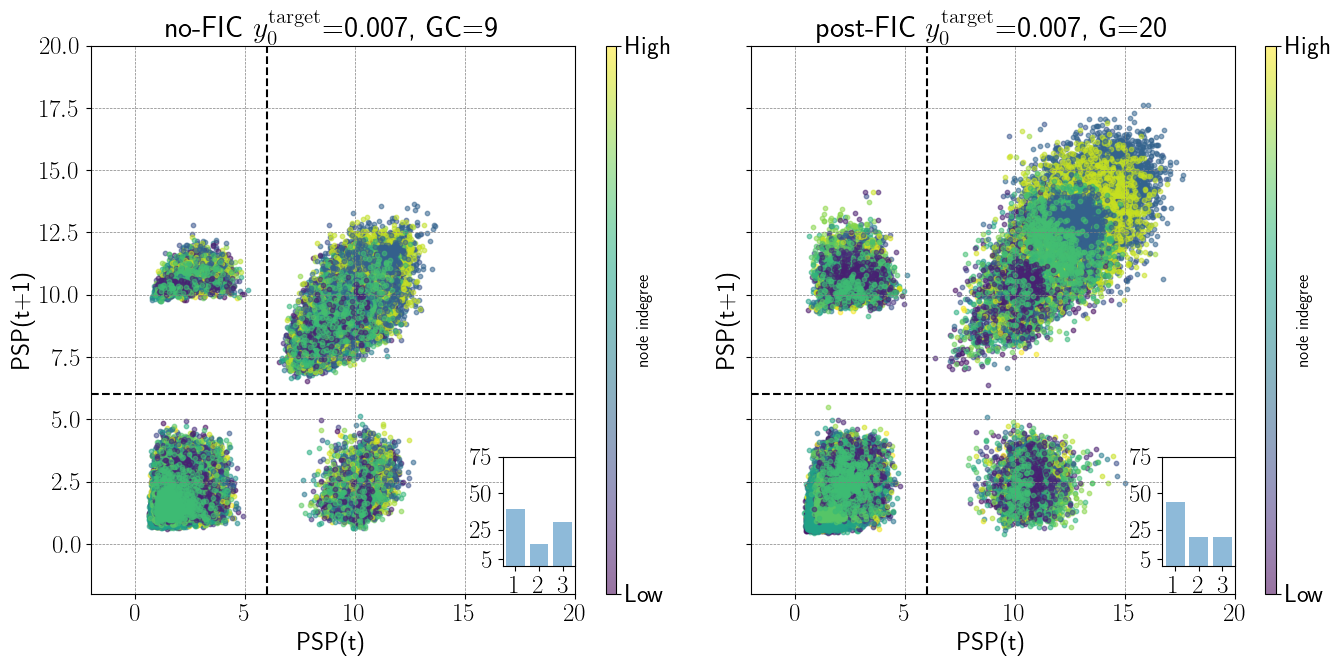

In [14]:
import matplotlib.pyplot as plt

# Assuming you have your post_node_dict and nf_node_dict
# Create a figure with two subplots sharing the same x and y axes
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

for c in range(2):
    if c == 1: 
        post_node_dict, rc1, snd, ax1, im = poincare_analysis(post1, node_order, axs[c], cmap=cmap84)
        axs[c].set_title(f'post-FIC $y_{{0}}^{{\\mathrm{{target}}}}$=0.007, G=20')
    if c == 0: 
        nf_node_dict, rc2, snd, ax2, im = poincare_analysis(nof1, node_order, axs[c], cmap=cmap84)
        axs[c].set_title(f'no-FIC $y_{{0}}^{{\\mathrm{{target}}}}$=0.007, GC=9')

rcs = [rc2, rc1]

for c, data_dict in enumerate([ nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]

    cbar = fig.colorbar(im , ax=axs[c], aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])
    print(rcs[c].values())

#AddPanelLabels(axs, label=custom_panels.T, fontsize=20)
fig.tight_layout()

if save_the_plots:
    fig.savefig(PLOT_LOC + f'best_post_vs_nof_poincare_maps_o{o_param}.jpg')
plt.rcParams.update({'font.size': 18})


(150001, 84)
noFIC:  {'FP': 4.26, 'SLC': 5.068, 'FLC': 90.672}
(150001, 84)
postFIC:  {'FP': 2.661, 'SLC': 5.367, 'FLC': 91.972}


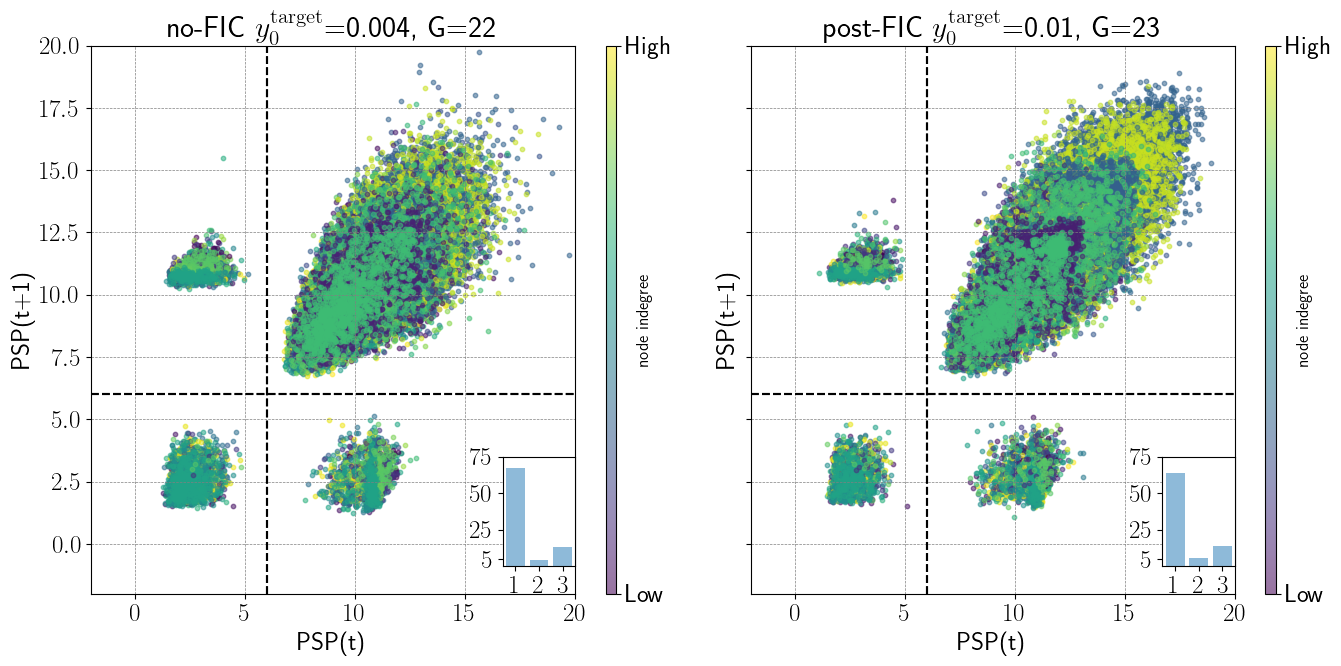

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14,7),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict, rc1, snd,ax1, im = poincare_analysis(post3, node_order, axs[c], cmap=cmap84)
        print('postFIC: ', post_node_dict)
        axs[c].set_title(f'post-FIC $y_{{0}}^{{\\mathrm{{target}}}}$=0.01, G=23')
    if c == 0: 
        nf_node_dict, rc2, snd, ax2, im = poincare_analysis(nof3, node_order, axs[c], cmap=cmap84)
        print('noFIC: ', nf_node_dict)
        axs[c].set_title(f'no-FIC $y_{{0}}^{{\\mathrm{{target}}}}$=0.004, G=22')


for ax in axs:
    ax.set_ylim(-2,20)
    ax.set_xlim(-2,20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]

for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=axs[c], aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])
    
    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

#fig.suptitle('Poincaré Maps')
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'second_best_post_vs_nof_poincare_maps_o{o_param}.jpg')
plt.rcParams.update({'font.size': 14})


(150001, 84)
no-FIC:  {'FP': 18.947, 'SLC': 5.998, 'FLC': 75.055}
(150001, 84)
post-FIC:  {'FP': 41.09, 'SLC': 18.289, 'FLC': 40.621}


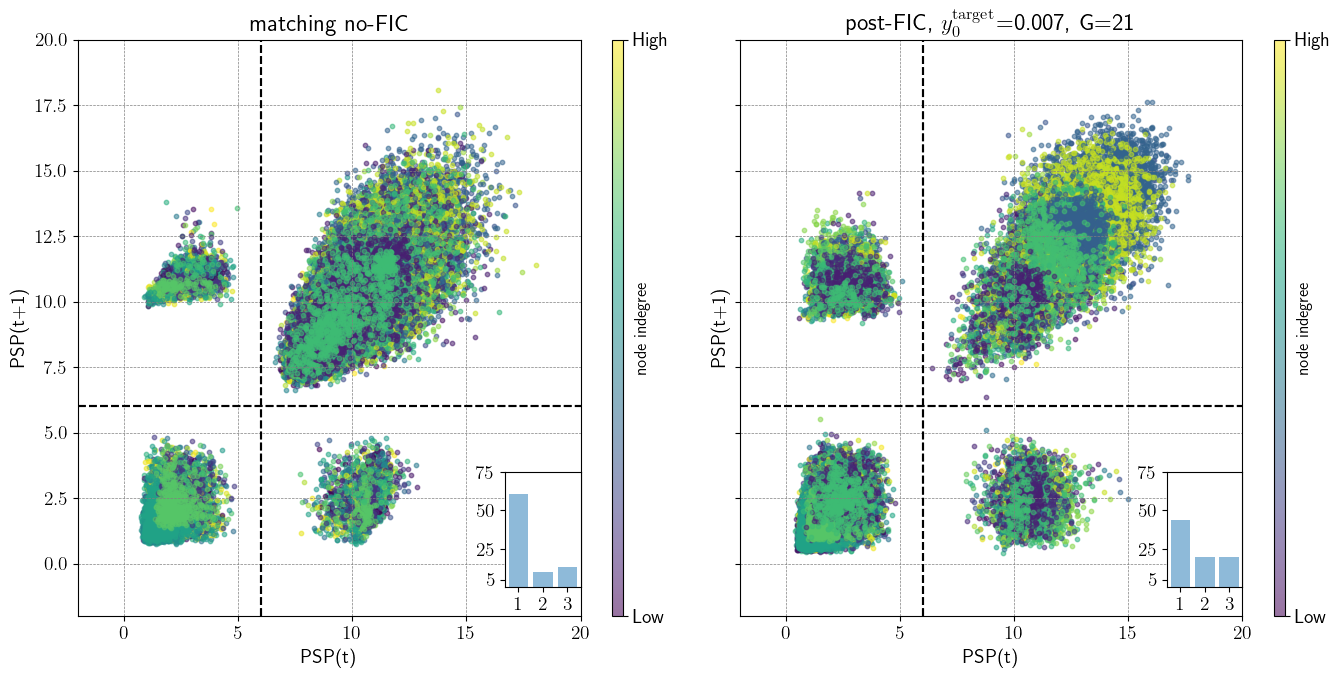

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14,7),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict, rc1, snd, ax1, im = poincare_analysis(post1, node_order, axs[c], cmap=cmap84)
        print('post-FIC: ', post_node_dict)
        axs[c].set_title(f'post-FIC, {lat_y0t}=0.007, G=21')
    if c == 0: 
        nf_node_dict, rc2, snd, ax2, im = poincare_analysis(mnof1, node_order, axs[c], cmap=cmap84)
        print('no-FIC: ', nf_node_dict)
        axs[c].set_title(f'matching no-FIC')

for ax in axs:
    ax.set_ylim(-2,20)
    ax.set_xlim(-2,20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]

for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the bottom-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'best_post_sims_vs_matching_y0xgc_nof_poincare_maps_o{o_param}.jpg')

plt.rcParams.update({'font.size': 14})


(150001, 84)
no FIC:  {'FP': 3.863, 'SLC': 5.438, 'FLC': 90.699}
(150001, 84)
postFIC:  {'FP': 2.661, 'SLC': 5.367, 'FLC': 91.972}


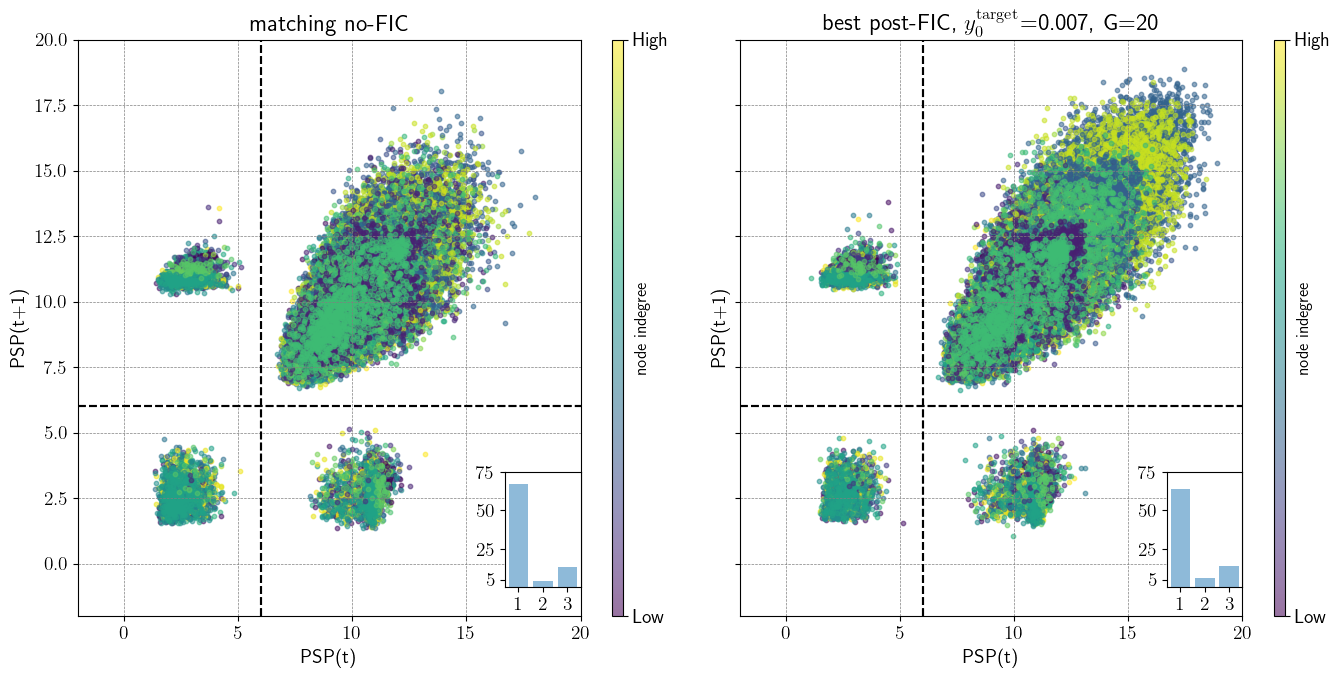

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14,7),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict, rc1, snd, ax1, im = poincare_analysis(post3, node_order, axs[c], cmap=cmap84)
        print('postFIC: ', post_node_dict)
        axs[c].set_title(f'best post-FIC, {lat_y0t}=0.007, G=20')
    if c == 0: 
        nf_node_dict, rc2, snd, ax2, im = poincare_analysis(mnof3, node_order, axs[c], cmap=cmap84)
        print('no FIC: ', nf_node_dict)
        axs[c].set_title(f'matching no-FIC')

for ax in axs:
    ax.set_ylim(-2,20)
    ax.set_xlim(-2,20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]

for c, data_dict in enumerate([nf_node_dict, post_node_dict ]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

#fig.suptitle('Poincaré Maps')
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'high_post_sims_vs_matching_y0xgc_nof_poincare_maps_o{o_param}.jpg')

plt.rcParams.update({'font.size': 14})

In [19]:
post_crit1 =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.1_072.npy', allow_pickle=True) if int(sgc_data[3]) == 11)[0] 
no_crit1 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.1_072.npy', allow_pickle=True) if int(sgc_data[3]) == 11)[0]


(150001, 84)
noFIC:  {'FP': 9.525, 'SLC': 10.444, 'FLC': 80.03}
(150001, 84)
postFIC:  {'FP': 7.658, 'SLC': 12.155, 'FLC': 80.186}


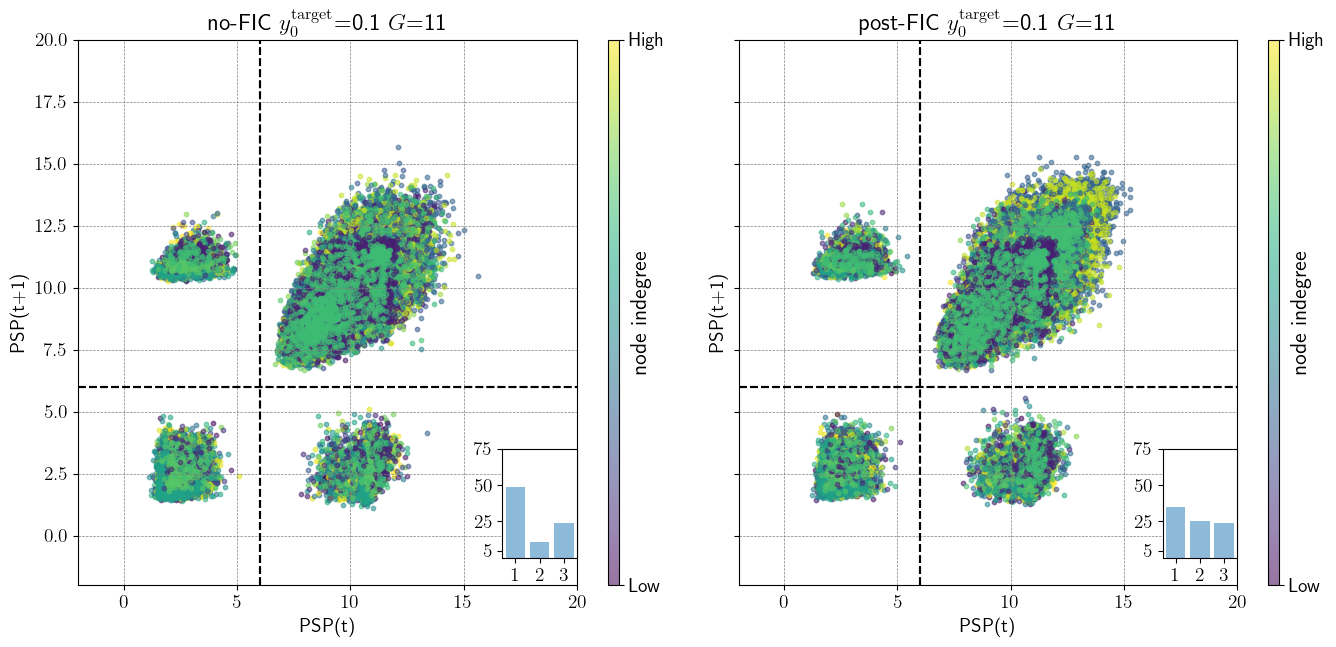

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14,6.75),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict,  rc1, snd, ax1, im = poincare_analysis(post_crit1 , node_order, axs[c], cmap=cmap84)
        print('postFIC: ',post_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.1 $G$=11')
    if c == 0: 
        nf_node_dict,  rc2, snd, ax2 , im= poincare_analysis(no_crit1 , node_order, axs[c], cmap=cmap84)
        print('noFIC: ',nf_node_dict)
        axs[c].set_title(f'no-FIC {lat_y0t}=0.1 $G$=11')

for ax in axs:
    ax.set_ylim(-3,22)
    ax.set_xlim(-3,22)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]
for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=16, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

#AddPanelLabels(axs, label=custom_panels[2:].T, fontsize=20)
plt.rcParams.update({'font.size': 16})
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'crit1_sims_poincare_maps_o{o_param}.jpg')

plt.rcParams.update({'font.size': 16})



In [21]:
post_crit2 =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.016_072.npy', allow_pickle=True) if int(sgc_data[3]) == 18)[0]
no_crit2 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.016_072.npy', allow_pickle=True) if int(sgc_data[3]) == 18)[0]

(150001, 84)
noFIC:  {'FP': 0.443, 'SLC': 2.521, 'FLC': 97.036}
(150001, 84)
postFIC:  {'FP': 6.077, 'SLC': 24.503, 'FLC': 69.42}


/var/folders/x5/d8lz0rt51159nw55bngwkm240000gn/T/ipykernel_62014/2502415142.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


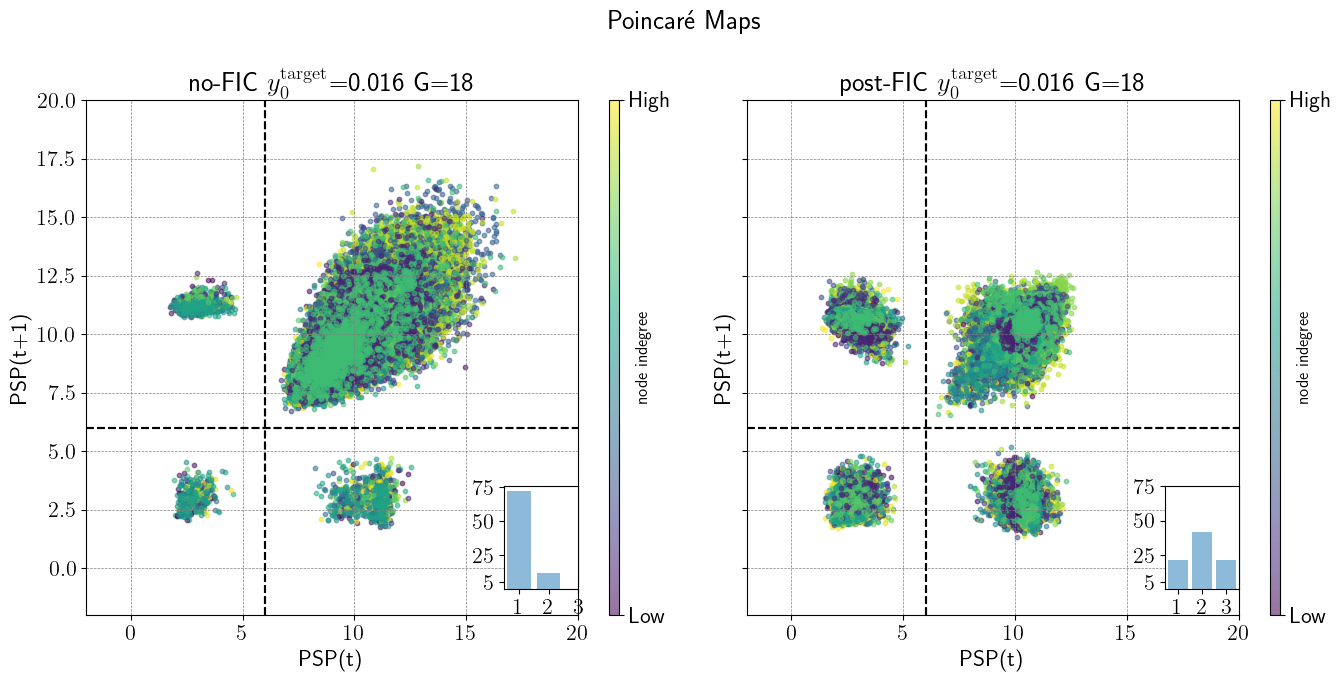

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14,7),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict,  rc1, snd, ax1, im = poincare_analysis(post_crit2 , node_order, axs[c], cmap=cmap84)
        print('postFIC: ',post_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.016 G=18')
    if c == 0: 
        nf_node_dict,  rc2, snd, ax2, im = poincare_analysis(no_crit2 , node_order, axs[c], cmap=cmap84)
        print('noFIC: ',nf_node_dict)
        axs[c].set_title(f'no-FIC {lat_y0t}=0.016 G=18')

for ax in axs:
    ax.set_ylim(-3,22)
    ax.set_xlim(-3,22)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]
for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

    
fig.suptitle('Poincaré Maps')
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'crit2_sims_poincare_maps_o{o_param}.jpg')

fig.show()
plt.rcParams.update({'font.size': 14})

In [23]:
post_crit3 =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) == 23)[0]
no_crit3 = next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) == 23)[0]

(150001, 84)
noFIC:  {'FP': 4.26, 'SLC': 5.068, 'FLC': 90.672}
(150001, 84)
postFIC:  {'FP': 76.847, 'SLC': 16.475, 'FLC': 6.678}


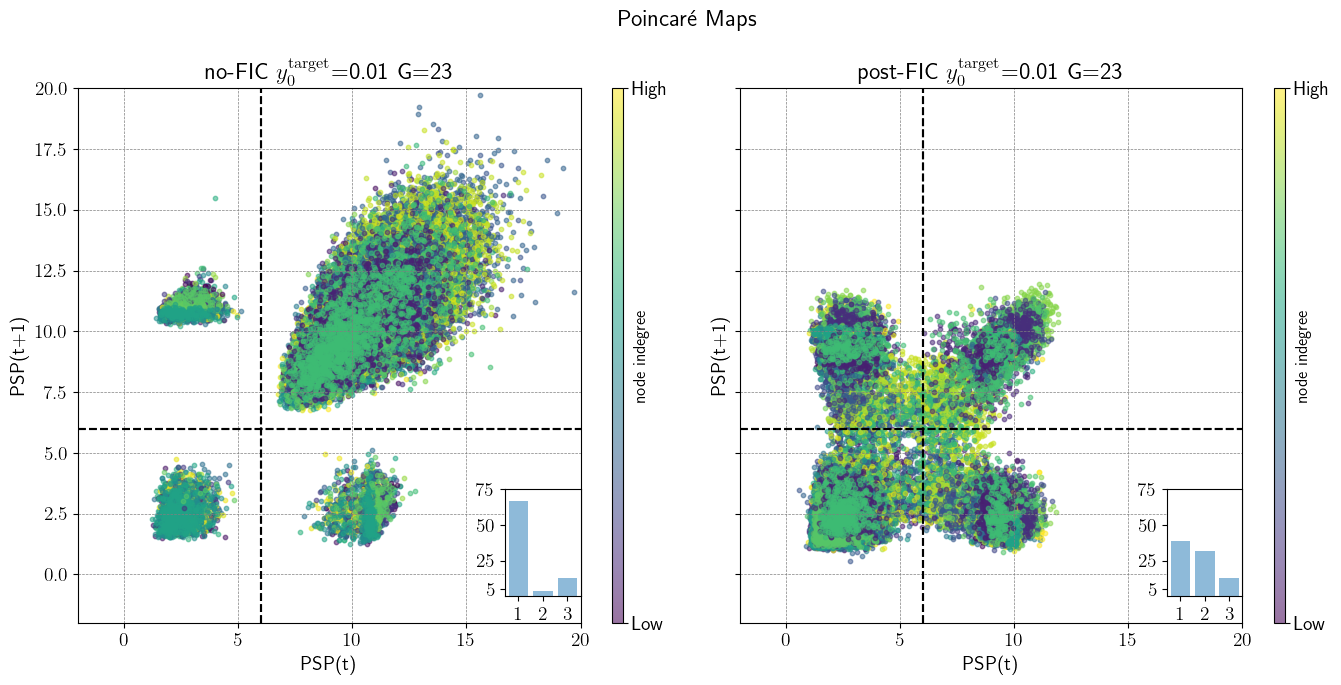

In [24]:

fig, axs = plt.subplots(1, 2, figsize=(14,7),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict,  rc1, snd, ax1, im = poincare_analysis(post_crit3 , node_order, axs[c], cmap=cmap84)
        print('postFIC: ',post_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.01 G=23')
    if c == 0: 
        nf_node_dict,  rc2, snd, ax2 , im= poincare_analysis(no_crit3, node_order, axs[c], cmap=cmap84)
        print('noFIC: ',nf_node_dict)
        axs[c].set_title(f'no-FIC {lat_y0t}=0.01 G=23')

for ax in axs:
    ax.set_ylim(-3,22)
    ax.set_xlim(-3,22)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]
for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

    
fig.suptitle('Poincaré Maps')
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'crit3_sims_poincare_maps_o{o_param}.jpg')

plt.rcParams.update({'font.size': 14})

In [25]:
post_bestFC =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 20)[0]
post_bestFCD =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 18)[0]

(150001, 84)
noFIC:  {'FP': 62.171, 'SLC': 14.304, 'FLC': 23.525}
(150001, 84)
postFIC:  {'FP': 41.09, 'SLC': 18.289, 'FLC': 40.621}


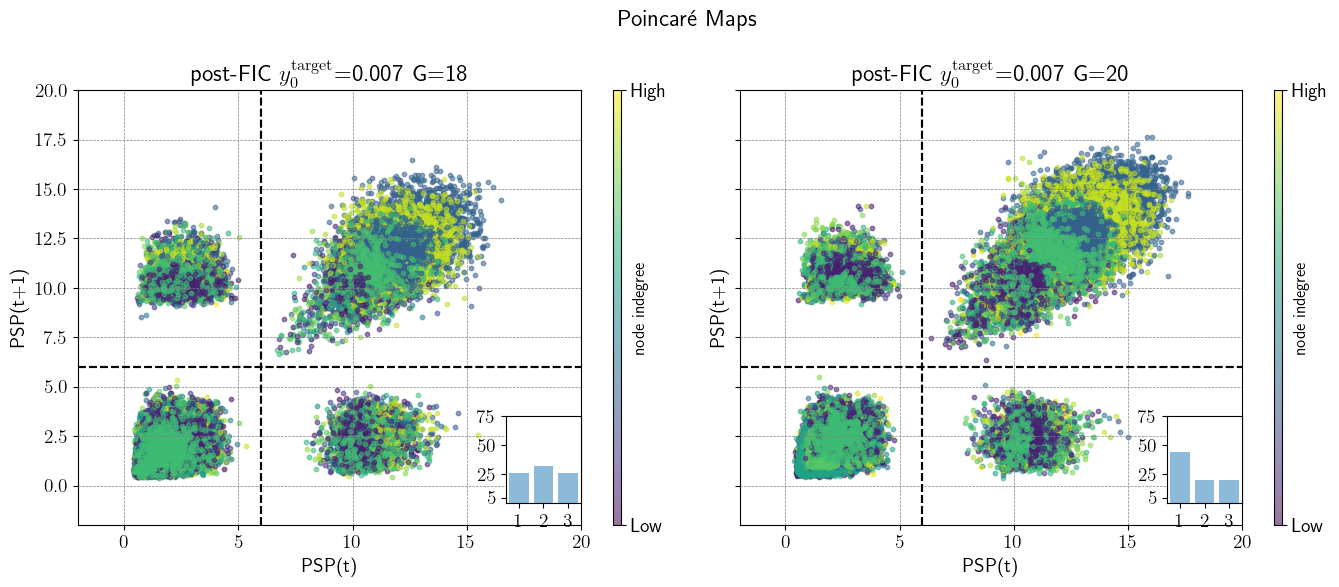

In [26]:

fig, axs = plt.subplots(1, 2, figsize=(14,6),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict,  rc1, snd, ax1, im = poincare_analysis(post_bestFC , node_order, axs[c], cmap=cmap84)
        print('postFIC: ',post_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.007 G=20')
    if c == 0: 
        nf_node_dict,  rc2, snd, ax2, im = poincare_analysis(post_bestFCD, node_order, axs[c], cmap=cmap84)
        print('noFIC: ',nf_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.007 G=18')

for ax in axs:
    ax.set_ylim(-3,22)
    ax.set_xlim(-3,22)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]
for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=12, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

    
fig.suptitle('Poincaré Maps')
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'fc_vs_fcd_sims_poincare_maps_o{o_param}.jpg')

plt.rcParams.update({'font.size': 14})

In [27]:
post_best_v5 =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'post_fic_results_stability_HCP_0.01_072.npy', allow_pickle=True) if int(sgc_data[3]) == 11)[0] #v5
no_best_v5 =  next(sgc_data for sgc_data in np.load(DATA_LOC + 'no_fic_sim_results_HCP_0.007_072.npy', allow_pickle=True) if int(sgc_data[3]) == 8)[0]

(150001, 84)
noFIC:  {'FP': 77.239, 'SLC': 7.535, 'FLC': 15.226}
(150001, 84)
postFIC:  {'FP': 59.759, 'SLC': 25.074, 'FLC': 15.168}


NameError: name 'AddPanelLabels' is not defined

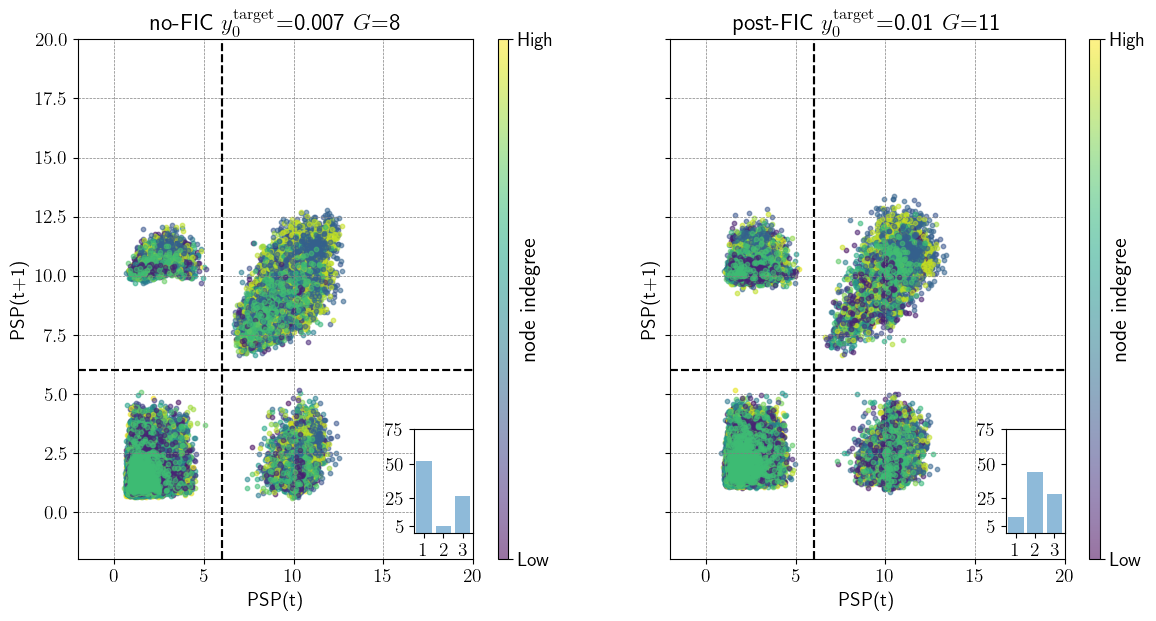

In [28]:

fig, axs = plt.subplots(1, 2, figsize=(14,6.75),sharex=True, sharey=True)
for c in range(2):
    if c == 1: 
        post_node_dict,  rc1, snd, ax1, im = poincare_analysis(post_best_v5 , node_order, axs[c], cmap=cmap84)
        print('postFIC: ',post_node_dict)
        axs[c].set_title(f'post-FIC {lat_y0t}=0.01 $G$=11')
    if c == 0: 
        nf_node_dict,  rc2, snd, ax2, im = poincare_analysis(no_best_v5, node_order, axs[c], cmap=cmap84)
        print('noFIC: ',nf_node_dict)
        axs[c].set_title(f'no-FIC {lat_y0t}=0.007 $G$=8')

for ax in axs:
    ax.set_ylim(-3,22)
    ax.set_xlim(-3,22)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

rcs = [rc2, rc1]
for c, data_dict in enumerate([nf_node_dict, post_node_dict]):
    x = range(len(data_dict))
    y = list(data_dict.values())

    ax = axs[c]
    #ax.scatter(x, y, label="Poincaré Map")
    cbar = fig.colorbar(im , ax=ax, aspect=50)
    cbar.set_label('node indegree', fontsize=16, labelpad=-25)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["Low", "High"])

    ax.set_ylim(-2, 20)
    ax.set_xlim(-2, 20)
    ax.axhline(6, color='k', linestyle='--')
    ax.axvline(6, color='k', linestyle='--')

    # Add a small bar plot in the top-right corner as a legend
    legend_ax = ax.inset_axes([0.85, 0.05, 0.15, 0.2])  # Adjust the position and size as needed
    legend_ax.bar(list(rcs[c].keys()), list(rcs[c].values()), alpha=0.5, label="Legend")
    legend_ax.set_xticks([1,2,3])
    legend_ax.set_yticks([5,25,50,75])

AddPanelLabels(axs, label=custom_panels[:].T, fontsize=20)
#fig.suptitle('Poincaré Maps')
plt.rcParams.update({'font.size': 16})
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + f'v5_sims_poincare_maps_o{o_param}.jpg')



['v5_sims_poincare_maps_o50.jpg', 'crit1_sims_poincare_maps_o50.jpg']


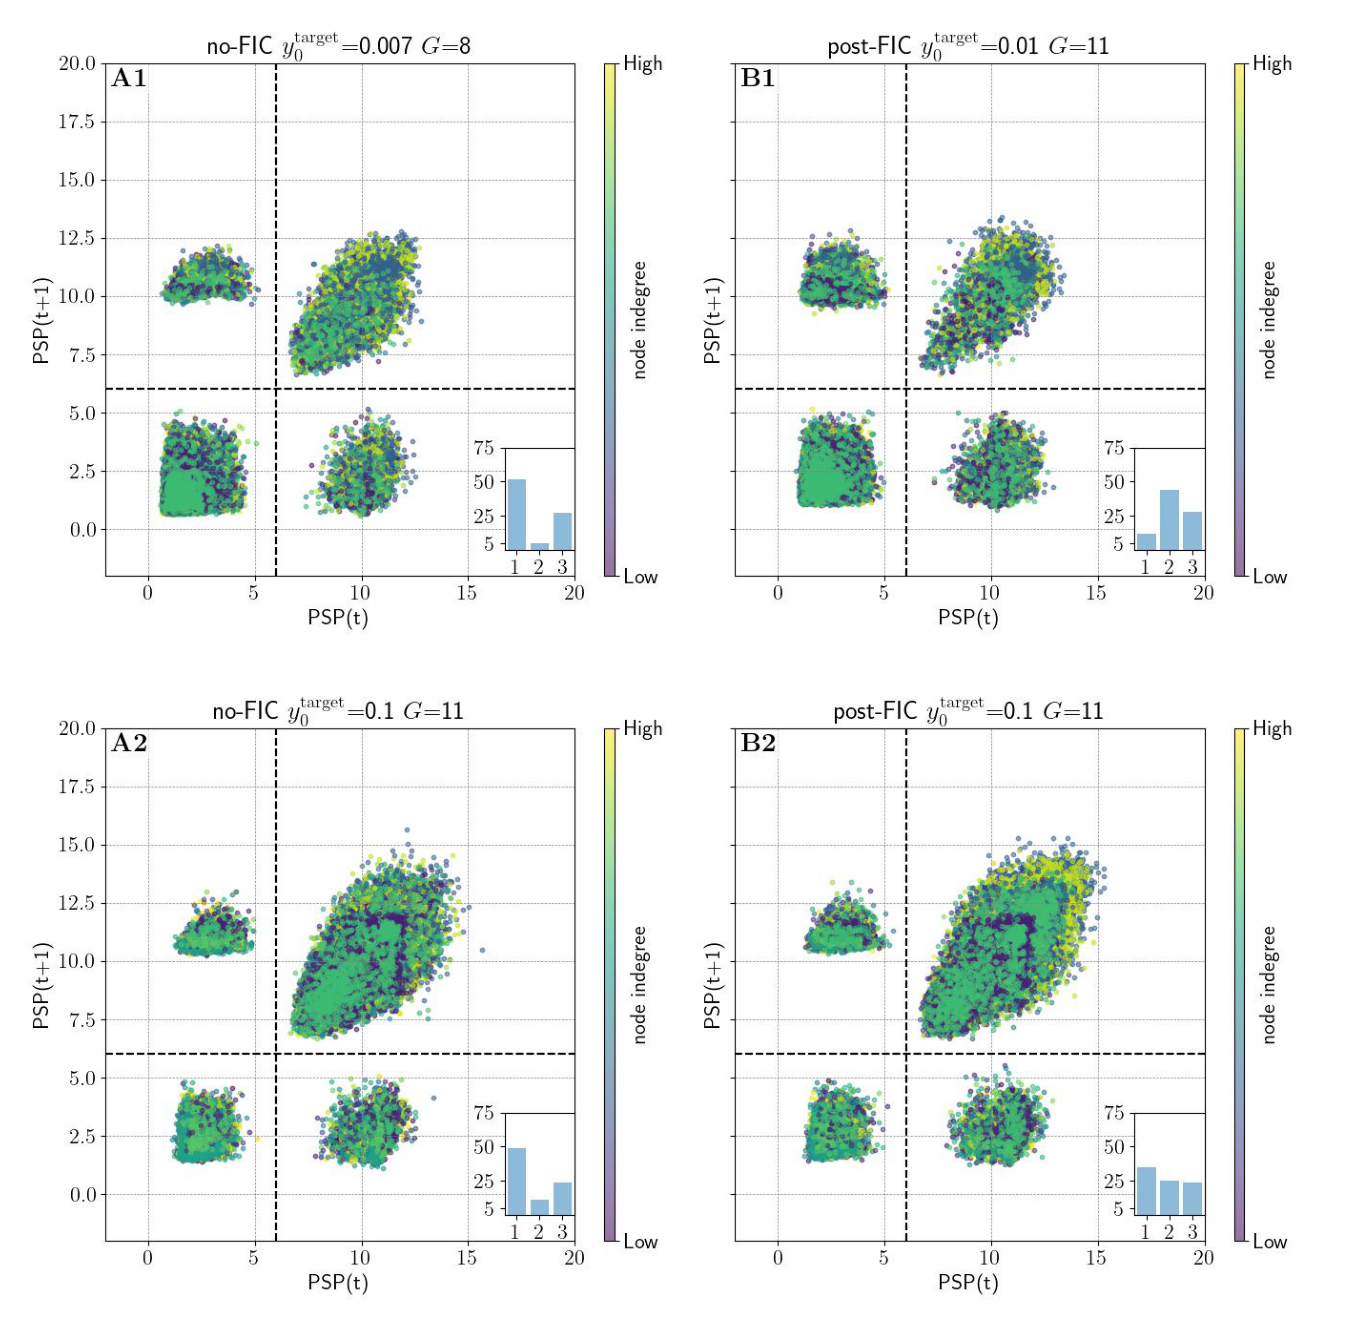

In [30]:
image_folder = PLOT_LOC

# # List image files
# image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
# image_files.insert(2,image_files[0])
image_files = [ 'v5_sims_poincare_maps_o50.jpg', 'crit1_sims_poincare_maps_o50.jpg']

print(image_files)
fig, axes = plt.subplots(2, 1, figsize=(14, 13.5))
axes = axes.ravel()

for i, ax in enumerate(axes):
        #image_path = os.path.join(image_folder, image_files[i])
    image = plt.imread(image_folder + image_files[i])
    ax.imshow(image)
    ax.axis('off')

#AddPanelLabels(axes, label=PanelsLettersUpper.T, fontsize=20)
fig.tight_layout()
if save_the_plots:
    fig.savefig(PLOT_LOC + 'final_poinc_paper_plot.png')

### Higher-level analysis: comparison on post-FIC and no-FIC poincare results across whole parameter space:

In [31]:
load_data = True
if not load_data:
    reg_dict = {}
    for res_file in os.listdir(DATA_LOC):
        if res_file.startswith('post'):
                y0_string = res_file.split('_')[5]
                print(y0_string)
                data = np.load(DATA_LOC + res_file, allow_pickle=True)
                reg_dict[y0_string] = {}
                for idx, sgc_data in enumerate(data):
                    gc = sgc_data[3]
                    fig, axs = plt.subplots(1)
                    node_dict, rc, snd, ax = poincare_analysis(sgc_data[0] , node_order, axs, cmap=cmap84)
                    reg_dict[y0_string][gc] =  node_dict, rc
                reg_dict[y0_string] = dict(sorted(reg_dict[y0_string].items(), key=lambda x: key_as_number(x[0])))

    if save_the_data:
        reg_dict = dict(sorted(reg_dict.items(), key=lambda x: key_as_number(x[0])))
        np.save(DATA_LOC + 'reg_dict_postFIC_data.npy', reg_dict, allow_pickle=True)
else:
    reg_dict = np.load(DATA_LOC2 + 'reg_dict_postFIC_data.npy', allow_pickle=True).item()

if not load_data:
    reg_dict_nf = {}
    for res_file in os.listdir(DATA_LOC):
        if res_file.startswith('no_'):
            y0_string = res_file.split('_')[5]
            print(y0_string)
            data = np.load(DATA_LOC + res_file, allow_pickle=True)
            reg_dict_nf[y0_string] = {}
            for idx, sgc_data in enumerate(data):
                gc = sgc_data[3]
                fig, axs = plt.subplots(1)
                node_dict_nf, rc_nf, snd, ax  = poincare_analysis(sgc_data[0] , node_order, axs, cmap=cmap84)
                reg_dict_nf[y0_string][gc] = node_dict_nf, rc_nf
            reg_dict_nf[y0_string] = dict(sorted(reg_dict_nf[y0_string].items(), key=lambda x: key_as_number(x[0])))

    if save_the_data:
        reg_dict_nf = dict(sorted(reg_dict_nf.items(), key=lambda x: key_as_number(x[0])))
        np.save(DATA_LOC + 'reg_dict_noFIC_data.npy', reg_dict_nf, allow_pickle=True)
else:
    reg_dict_nf = np.load(DATA_LOC2 + 'reg_dict_noFIC_data.npy', allow_pickle=True).item()


In [32]:
reg_dict.keys()
reg_dict['0.001']['20']
y0s = [0.001, 0.004, 0.007, 0.01, 0.013, 0.016, 0.0189, 0.1, 0.11, 0.12, 0.13, 0.14]
gcs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [33]:
def did_improve(reg_dict, reg_dict_nf, verbose=False):
    reg_diff = np.zeros([3,12,30])
    for ydx, y0t in enumerate(reg_dict.keys()):
        for gdx, gc in enumerate(reg_dict[y0t].keys()):
            rc = dict(reg_dict[y0t][gc][1])
            #print(rc.keys())
            rc_nf = dict(reg_dict_nf[y0t][gc][1])
            for nreg in [1,2,3]:
                if nreg not in rc.keys():
                    #if verbose: print(f'for {y0t,gc} postFIC adding {nreg} key')
                    rc[nreg] = 0
                if nreg not in rc_nf.keys():
                    #if verbose: print(f'for {y0t,gc} postFIC adding {nreg} key')
                    rc_nf[nreg] = 0

            if rc[2] > rc_nf[2]:
                #print(rc[2], rc_nf[2])
                reg_diff[0,ydx,gdx] = 1
            elif rc[2] < rc_nf[2]:
                reg_diff[0,ydx,gdx] = -1
            else:
                reg_diff[0,ydx,gdx] = 0

            if rc[3] > rc_nf[3]:
                #print(rc[3], rc_nf[3])
                reg_diff[1,ydx,gdx] = 1
            elif rc[3] < rc_nf[3]:
                reg_diff[1,ydx,gdx] = -1
            else:
                reg_diff[1,ydx,gdx] = 0


            if (rc[2] + rc[3]) > (rc_nf[2] + rc_nf[3]):
                if verbose: print(f'{y0t}_{gc}_pFIC: {rc[1], rc[2] , rc[3]} > noFIC {rc[1], rc_nf[2] , rc_nf[3]} 1 --> {ydx,gdx}')
                #print(rc[2] + rc[3], rc_nf[2] + rc_nf[3])
                reg_diff[2,ydx,gdx] = 1
            elif (rc[2] + rc[3]) < (rc_nf[2] + rc_nf[3]):
                if verbose: print(f'{y0t}_{gc}_pFIC: {rc[1], rc[2] , rc[3]} < noFIC {rc[1], rc_nf[2] , rc_nf[3]} (-1) --> {ydx,gdx}')
                reg_diff[2,ydx,gdx] = -1
            else:
                #if verbose: print(f'{y0t}_{gc}_pFIC: {rc[2] , rc[3]} = noFIC {rc_nf[2] , rc_nf[3]}')
                reg_diff[2,ydx,gdx] = 0
    return reg_diff


            
        

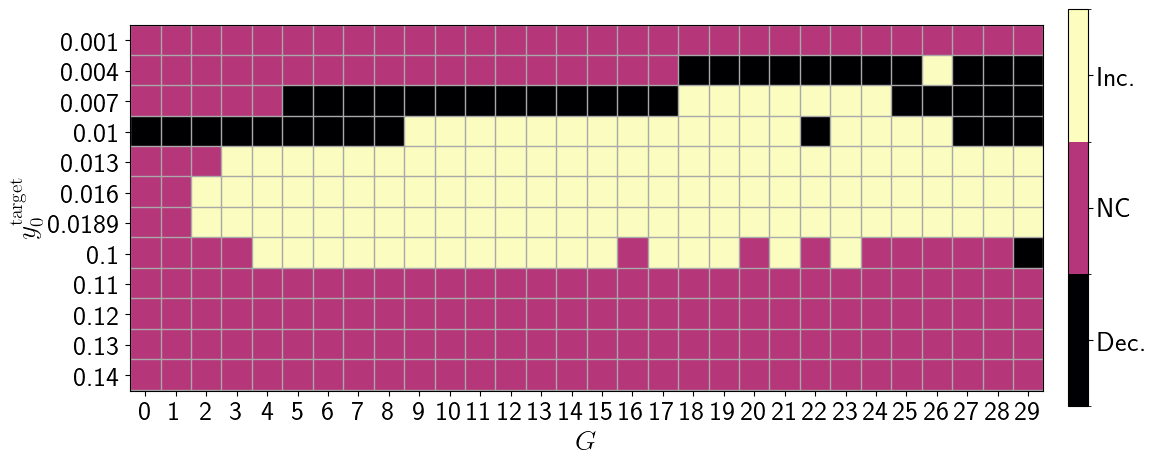

In [35]:
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
# Define custom colormap and normalization
plt.rcParams.update({'font.size': 20})
cmap = plt.cm.magma
norm = BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap.N)
fig, ax  = plt.subplots(1, figsize=(12,5))
im2 = ax.imshow(reg_diff[2,:,:], cmap = cmap, norm=norm)

ax.set_yticks(range(12))
ax.set_yticklabels(y0s)
ax.set_ylabel(f'{lat_y0t}')
ax.set_xticks(range(len(gcs)))
ax.set_xticklabels(gcs)
ax.set_xlabel('$G$')

# Custom colorbar
cbar_ticks = [-1, 0, 1]
cbar_labels = ['Dec.', 'NC', 'Inc.']
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.056, pad=0.025, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels)
# Add grid
for i in range(len(gcs)+1):
    ax.vlines(i-0.5, -0.5, len(y0s)-0.5, color='darkgray', linewidth=1)
for j in range(len(y0s)+1):
    if j == 0:  # Adjust the first horizontal gridline
        ax.hlines(j-0.5, -0.5, len(gcs)-0.5, color='darkgray', linewidth=1)
    else:
        ax.hlines(j-0.53, -0.5, len(gcs)-0.5, color='darkgray', linewidth=1)
fig.tight_layout()
fig.savefig(PLOT_LOC+ 'poincare_pFIC_impovement_heatmap.jpg')